<a href="https://colab.research.google.com/github/matyi101/stats/blob/main/Forecasting_Loan_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MANB 1123 - Business Statistic for Data Analysis
## Class Project


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

plt.style.use('fivethirtyeight')

## 1. Exploratory Data Analysis



### 1.1 Islamic Banks - Loan Application by Purpose

In [ ]:
# Load All Datasets
url = 'https://raw.githubusercontent.com/matyi101/stats/main/islamic_loan.csv'
df = pd.read_csv(url)
df.drop('consumer loan', inplace=True, axis=1)
df.set_index('date', inplace=True )
df.describe() 
# saving the dataframe
df.to_csv('islamic.csv')


In [ ]:
df.head()

,vehicle,property,personal,credit card
date,,,,
2011-01-01,2706.397,2147.472,1574.988,238.925
2011-02-01,1992.288,1955.299,1455.753,166.503
2011-03-01,2313.784,3072.997,2180.135,277.362
2011-04-01,1883.896,3635.457,1716.299,255.266
2011-05-01,2232.802,4138.049,1843.763,209.453


In [ ]:
df.columns = ['isl_auto','isl_prop','isl_per','isl_cc']
df

,isl_auto,isl_prop,isl_per,isl_cc
date,,,,
2011-01-01,2706.397,2147.472,1574.988,238.925
2011-02-01,1992.288,1955.299,1455.753,166.503
2011-03-01,2313.784,3072.997,2180.135,277.362
2011-04-01,1883.896,3635.457,1716.299,255.266
2011-05-01,2232.802,4138.049,1843.763,209.453
...,...,...,...,...
2020-08-01,4776.557,11844.264,2554.465,564.418
2020-09-01,4960.012,13037.043,2987.149,629.092
2020-10-01,3867.833,12389.451,2658.326,459.273


In [ ]:
print("Skewness")
print(df.skew())
print()
print("Kurtosis")
print(df.kurt())

Skewness
isl_auto    0.544650
isl_prop    0.983646
isl_per     0.358487
isl_cc      0.629950
dtype: float64

Kurtosis
isl_auto    1.582594
isl_prop    0.432356
isl_per    -0.298789
isl_cc      0.646457
dtype: float64


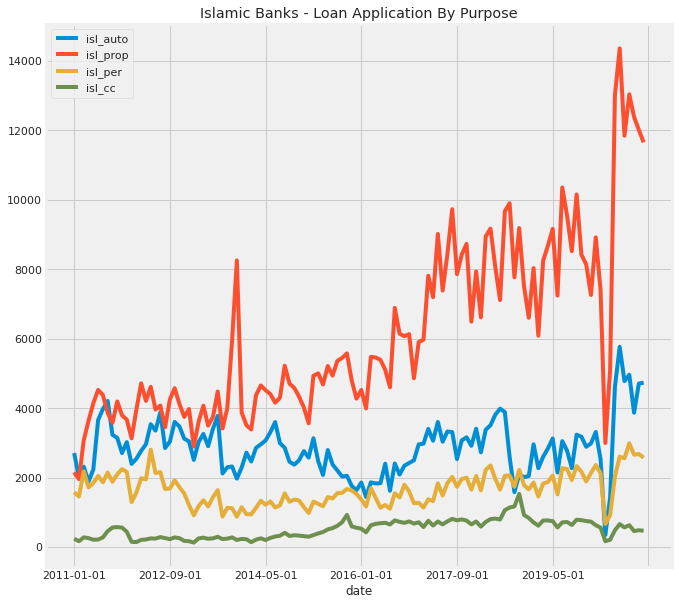

In [ ]:
df.plot(figsize=(10, 10), title ="Islamic Banks - Loan Application By Purpose")

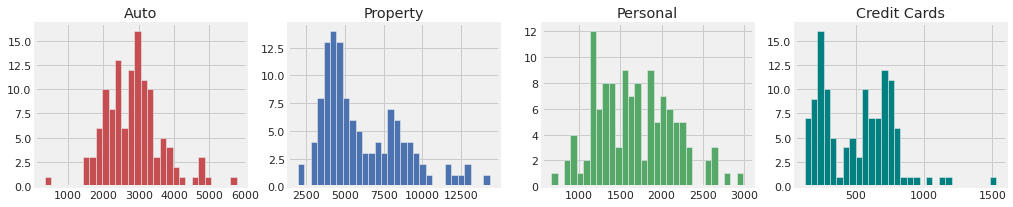

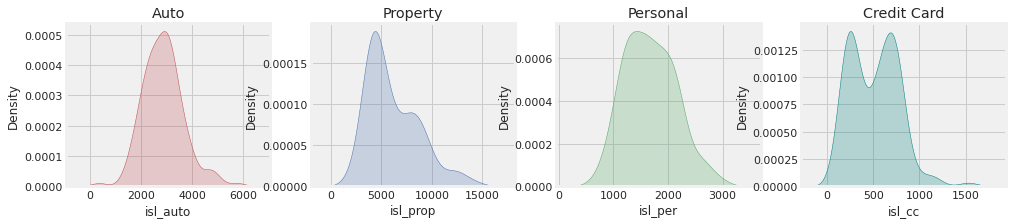

Text(0.5, 1.0, 'Credit Card: Q-Q plot')

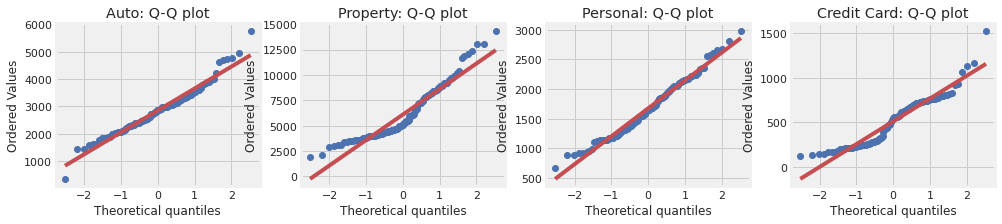

In [ ]:
# Histogram

plt.figure(figsize=(15.5, 3))

plt.subplot(1, 4, 1)
df['isl_auto'].hist(bins = 30, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
df['isl_prop'].hist(bins = 30, color='b')
plt.title('Property')

plt.subplot(1, 4, 3)
df['isl_per'].hist(bins = 30, color='g')
plt.title('Personal')

plt.subplot(1, 4, 4)
df['isl_cc'].hist(bins = 30, color='teal')
plt.title('Credit Cards')


# Density Distribution Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)
sns.kdeplot(df['isl_auto'], shade=True, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
sns.kdeplot(df['isl_prop'], shade=True, color="b")
plt.title('Property')

plt.subplot(1, 4, 3)
sns.kdeplot(df['isl_per'], shade=True, color="g")
plt.title('Personal')

plt.subplot(1, 4, 4)
sns.kdeplot(df['isl_cc'], shade=True, color="teal")
plt.title('Credit Card')


plt.show()

# Q-Q Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)

stats.probplot(df['isl_auto'], dist="norm", plot=plt)
plt.title("Auto: Q-Q plot")

plt.subplot(1, 4, 2)

stats.probplot(df['isl_prop'], dist="norm", plot=plt)
plt.title("Property: Q-Q plot")

plt.subplot(1, 4, 3)
stats.probplot(df['isl_per'], dist="norm", plot=plt)
plt.title("Personal: Q-Q plot")


plt.subplot(1, 4, 4)
stats.probplot(df['isl_cc'], dist="norm", plot=plt)
plt.title("Credit Card: Q-Q plot")


In [ ]:
# Test for Normality
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest

# Shapiro-Wilk Test
    
core_columns =  ['isl_auto','isl_prop','isl_per','isl_cc']

for column in core_columns:
    print(column)
    stat, p = shapiro(df[column])
    # interpret
    alpha = 0.05
    if p > alpha:
      print('Shapiro-Wilk Test: ','Statistics=%.3f, p=%.3f' % (stat, p))
      print('Gaussian (fail to reject H0):','Parametric Statistical Methods')
    else:
      print('Shapiro-Wilk Test: ','Statistics=%.3f, p=%.3f' % (stat, p))
      print('Non Gaussian (reject H0):','Nonparametric Statistical Methods')

# D'Agostino and Pearson's Test

    stat, p = normaltest(df[column])
    # interpret
    alpha = 0.05
    if p > alpha:
      print("D'Agostino and Pearson's Test:",'Statistics=%.3f, p=%.3f' % (stat, p))
      print('Gaussian (fail to reject H0):','Parametric Statistical Methods')
      print()
    else:
      print("D'Agostino and Pearson's Test:",'Statistics=%.3f, p=%.3f' % (stat, p))
      print('Non Gaussian (reject H0):','Use Nonparametric Statistical Methods')
      print()


isl_auto
Shapiro-Wilk Test:  Statistics=0.970, p=0.009
Non Gaussian (reject H0): Nonparametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=12.159, p=0.002
Non Gaussian (reject H0): Use Nonparametric Statistical Methods

isl_prop
Shapiro-Wilk Test:  Statistics=0.909, p=0.000
Non Gaussian (reject H0): Nonparametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=16.857, p=0.000
Non Gaussian (reject H0): Use Nonparametric Statistical Methods

isl_per
Shapiro-Wilk Test:  Statistics=0.983, p=0.122
Gaussian (fail to reject H0): Parametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=3.067, p=0.216
Gaussian (fail to reject H0): Parametric Statistical Methods

isl_cc
Shapiro-Wilk Test:  Statistics=0.924, p=0.000
Non Gaussian (reject H0): Nonparametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=9.465, p=0.009
Non Gaussian (reject H0): Use Nonparametric Statistical Methods



## 1.2 Commercial Banks - Loan Applications by Purpose

In [ ]:
url = 'https://raw.githubusercontent.com/matyi101/stats/main/commercial_loan.csv'
df1 = pd.read_csv(url)
df1.drop('consumer loan', inplace=True, axis=1)
df1.set_index('date', inplace=True )
df1.describe()  


,vehicle,property,personal,credit card
count,120.000000,120.00000,120.000000,120.000000
mean,4020.556667,13084.78500,2946.404167,2433.419167
std,1016.237521,2687.38631,895.542176,731.107649
min,298.600000,3671.10000,993.500000,967.100000
25%,3250.850000,11582.00000,2210.450000,1810.600000
50%,4090.400000,13159.75000,2998.650000,2459.750000
75%,4743.475000,14711.47500,3655.725000,3018.800000
max,7245.900000,20477.00000,5680.400000,4393.100000


In [ ]:
print("Skewness")
print(df1.skew())
print()
print("Kurtosis")
print(df1.kurt())

Skewness
vehicle       -0.248927
property      -0.249739
personal       0.043845
credit card    0.127167
dtype: float64

Kurtosis
vehicle        1.101859
property       1.136391
personal      -0.492991
credit card   -0.746854
dtype: float64


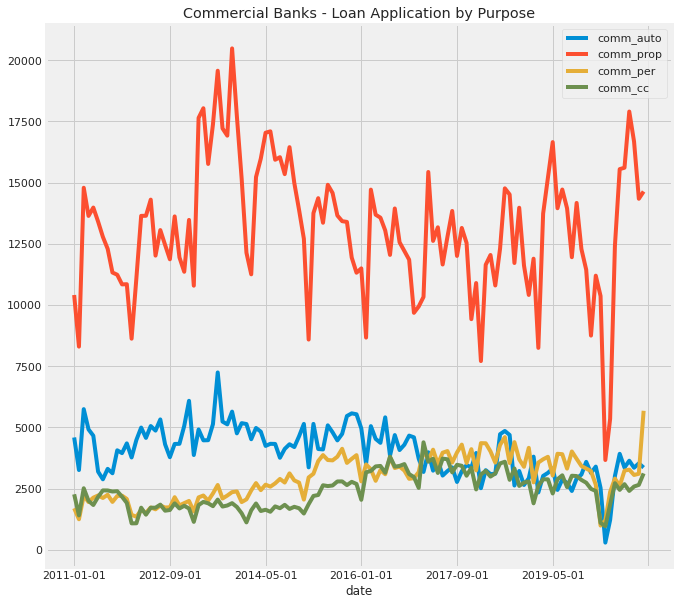

In [ ]:
df1.columns = ['comm_auto','comm_prop','comm_per','comm_cc']
df1.plot(figsize=(10, 10), title ="Commercial Banks - Loan Application by Purpose")

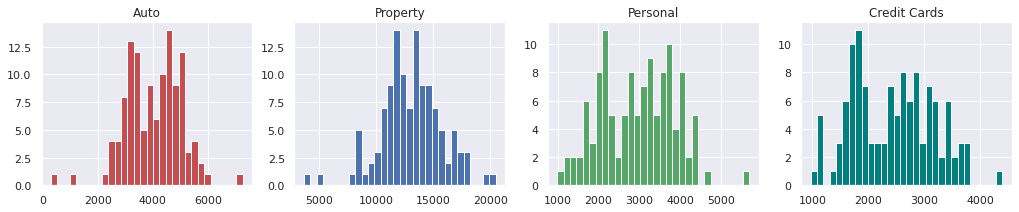

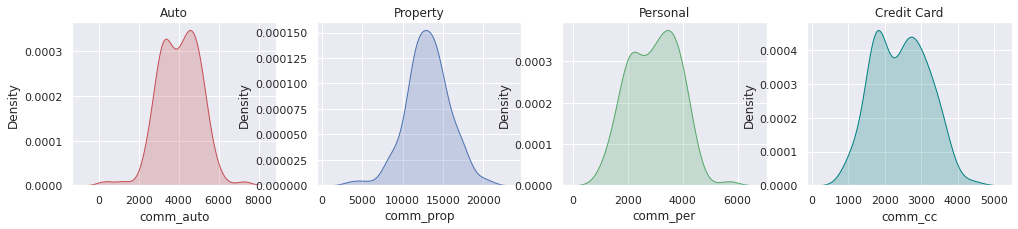

Text(0.5, 1.0, 'Credit Card - Q-Q plot')

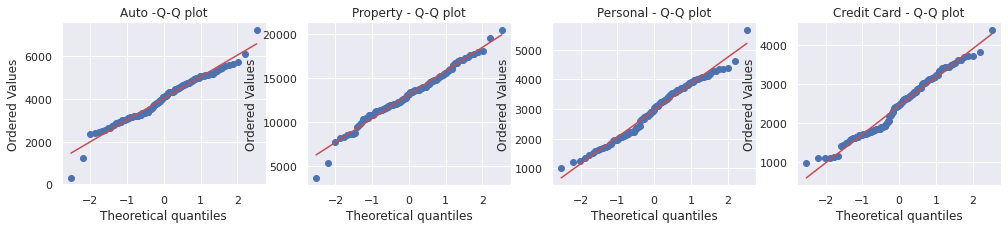

In [ ]:
# Histogram

plt.figure(figsize=(15.5, 3))

plt.subplot(1, 4, 1)
df1['comm_auto'].hist(bins = 30, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
df1['comm_prop'].hist(bins = 30, color='b')
plt.title('Property')

plt.subplot(1, 4, 3)
df1['comm_per'].hist(bins = 30, color='g')
plt.title('Personal')

plt.subplot(1, 4, 4)
df1['comm_cc'].hist(bins = 30, color='teal')
plt.title('Credit Cards')


# Density Distribution Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)
sns.kdeplot(df1['comm_auto'], shade=True, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
sns.kdeplot(df1['comm_prop'], shade=True, color="b")
plt.title('Property')

plt.subplot(1, 4, 3)
sns.kdeplot(df1['comm_per'], shade=True, color="g")
plt.title('Personal')

plt.subplot(1, 4, 4)
sns.kdeplot(df1['comm_cc'], shade=True, color="teal")
plt.title('Credit Card')


plt.show()

# Q-Q Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)

stats.probplot(df1['comm_auto'], dist="norm", plot=plt)
plt.title("Auto -Q-Q plot")

plt.subplot(1, 4, 2)

stats.probplot(df1['comm_prop'], dist="norm", plot=plt)
plt.title("Property - Q-Q plot")

plt.subplot(1, 4, 3)
stats.probplot(df1['comm_per'], dist="norm", plot=plt)
plt.title("Personal - Q-Q plot")


plt.subplot(1, 4, 4)
stats.probplot(df1['comm_cc'], dist="norm", plot=plt)
plt.title("Credit Card - Q-Q plot")

In [ ]:
# Test for Normality
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest

# Shapiro-Wilk Test
    
core_columns =  ['comm_auto','comm_prop','comm_per','comm_cc']

for column in core_columns:
    print(column)
    stat, p = shapiro(df1[column])
    # interpret
    alpha = 0.05
    if p > alpha:
      print('Shapiro-Wilk Test: ','Statistics=%.3f, p=%.3f' % (stat, p))
      print('Gaussian (fail to reject H0):','Parametric Statistical Methods')
    else:
      print('Shapiro-Wilk Test: ','Statistics=%.3f, p=%.3f' % (stat, p))
      print('Non Gaussian (reject H0):','Nonparametric Statistical Methods')

# D'Agostino and Pearson's Test

    stat, p = normaltest(df1[column])
    # interpret
    alpha = 0.05
    if p > alpha:
      print("D'Agostino and Pearson's Test:",'Statistics=%.3f, p=%.3f' % (stat, p))
      print('Gaussian (fail to reject H0):','Parametric Statistical Methods')
      print()
    else:
      print("D'Agostino and Pearson's Test:",'Statistics=%.3f, p=%.3f' % (stat, p))
      print('Non Gaussian (reject H0):','Use Nonparametric Statistical Methods')
      print()



comm_auto
Shapiro-Wilk Test:  Statistics=0.976, p=0.030
Non Gaussian (reject H0): Nonparametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=5.372, p=0.068
Gaussian (fail to reject H0): Parametric Statistical Methods

comm_prop
Shapiro-Wilk Test:  Statistics=0.985, p=0.190
Gaussian (fail to reject H0): Parametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=5.546, p=0.062
Gaussian (fail to reject H0): Parametric Statistical Methods

comm_per
Shapiro-Wilk Test:  Statistics=0.981, p=0.083
Gaussian (fail to reject H0): Parametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=1.801, p=0.406
Gaussian (fail to reject H0): Parametric Statistical Methods

comm_cc
Shapiro-Wilk Test:  Statistics=0.975, p=0.027
Non Gaussian (reject H0): Nonparametric Statistical Methods
D'Agostino and Pearson's Test: Statistics=6.652, p=0.036
Non Gaussian (reject H0): Use Nonparametric Statistical Methods



In [ ]:
# Total Loan Application Combined (Total = Islamic + Commercial)

url = 'https://raw.githubusercontent.com/matyi101/stats/main/total_loan.csv'
df2 = pd.read_csv(url)
df2.drop('consumer loan', inplace=True, axis=1)
df2.set_index('date', inplace=True )
df2.describe()  

,vehicle,property,personal,credit card
count,120.00000,120.000000,120.000000,120.000000
mean,6868.53830,19184.510175,4616.808350,2944.364283
std,1301.82054,4038.557737,1081.598204,941.967355
min,642.83600,6665.860000,1874.930000,1133.402000
25%,6282.93675,16558.760000,3825.429500,2056.516500
50%,6905.57350,19033.348000,4520.251500,3048.061000
75%,7629.25025,21196.318750,5443.127000,3691.743000
max,11021.77400,30935.843000,8251.624000,4967.883000


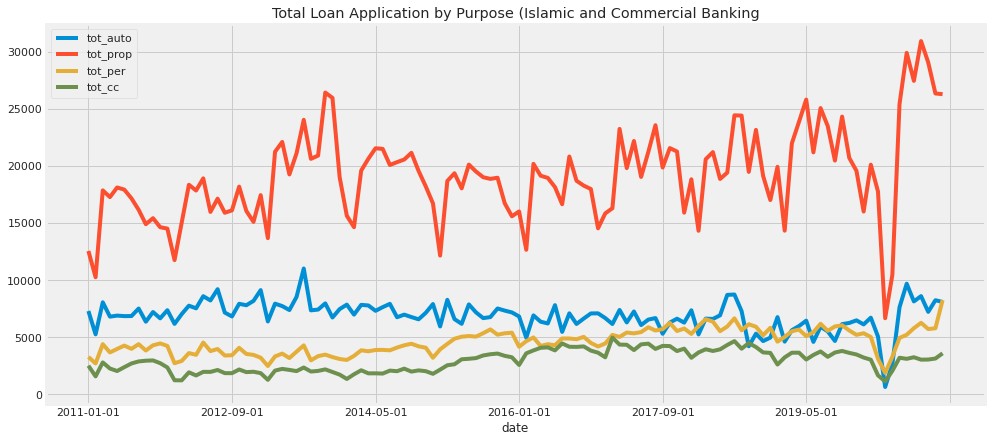

In [ ]:
df2.columns = ['tot_auto','tot_prop','tot_per','tot_cc']
df2.plot(figsize=(15, 7), title ="Total Loan Application by Purpose (Islamic and Commercial Banking")

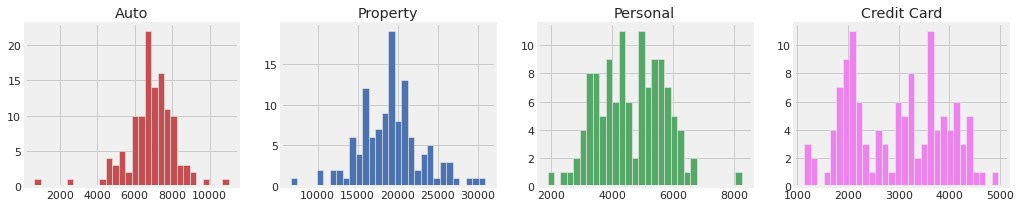

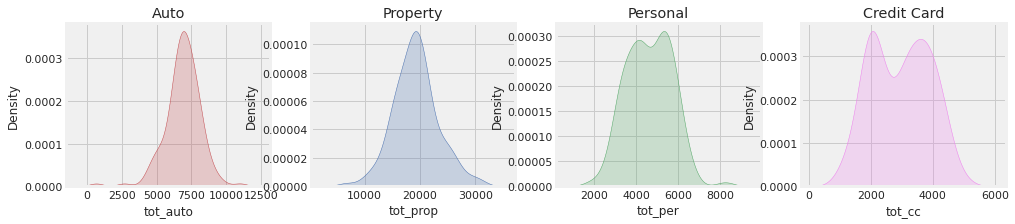

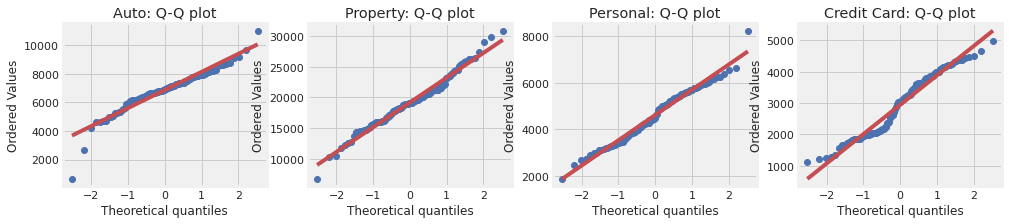

In [ ]:
# Histogram

plt.figure(figsize=(15.7, 3))

plt.subplot(1, 4, 1)
df2['tot_auto'].hist(bins = 30, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
df2['tot_prop'].hist(bins = 30, color='b')
plt.title('Property')

plt.subplot(1, 4, 3)
df2['tot_per'].hist(bins = 30, color='g')
plt.title('Personal')

plt.subplot(1, 4, 4)
df2['tot_cc'].hist(bins = 30, color='violet')
plt.title('Credit Card')

plt.show()

# Density Distribution Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)
sns.kdeplot(df2['tot_auto'], shade=True, color="r")
plt.title('Auto')

plt.subplot(1, 4, 2)
sns.kdeplot(df2['tot_prop'], shade=True, color="b")
plt.title('Property')

plt.subplot(1, 4, 3)
sns.kdeplot(df2['tot_per'], shade=True, color="g")
plt.title('Personal')

plt.subplot(1, 4, 4)
sns.kdeplot(df2['tot_cc'], shade=True, color="violet")
plt.title('Credit Card')

plt.show()

# Q-Q Plot

plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)

stats.probplot(df2['tot_auto'], dist="norm", plot=plt)
plt.title("Auto: Q-Q plot")

plt.subplot(1, 4, 2)

stats.probplot(df2['tot_prop'], dist="norm", plot=plt)
plt.title("Property: Q-Q plot")

plt.subplot(1, 4, 3)
stats.probplot(df2['tot_per'], dist="norm", plot=plt)
plt.title("Personal: Q-Q plot")


plt.subplot(1, 4, 4)
stats.probplot(df2['tot_cc'], dist="norm", plot=plt)
plt.title("Credit Card: Q-Q plot")

plt.show()

In [ ]:
data = pd.concat([df2,df,df1], axis=1)
data

,tot_auto,tot_prop,tot_per,tot_cc,isl_auto,isl_prop,isl_per,isl_cc,comm_auto,comm_prop,comm_per,comm_cc
date,,,,,,,,,,,,
2011-01-01,7297.297,12555.372,3275.188,2509.525,2706.397,2147.472,1574.988,238.925,4590.9,10407.9,1700.2,2270.6
2011-02-01,5253.588,10256.199,2706.553,1575.203,1992.288,1955.299,1455.753,166.503,3261.3,8300.9,1250.8,1408.7
2011-03-01,8060.884,17859.497,4393.635,2794.762,2313.784,3072.997,2180.135,277.362,5747.1,14786.5,2213.5,2517.4
2011-04-01,6804.096,17272.257,3670.599,2259.666,1883.896,3635.457,1716.299,255.266,4920.2,13636.8,1954.3,2004.4
2011-05-01,6895.502,18116.349,3976.663,2042.853,2232.802,4138.049,1843.763,209.453,4662.7,13978.3,2132.9,1833.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,8138.057,27449.064,5790.465,3248.918,4776.557,11844.264,2554.465,564.418,3361.5,15604.8,3236.0,2684.5
2020-09-01,8601.512,30935.843,6263.649,3037.792,4960.012,13037.043,2987.149,629.092,3641.5,17898.8,3276.5,2408.7
2020-10-01,7223.833,29060.751,5718.026,3047.773,3867.833,12389.451,2658.326,459.273,3356.0,16671.3,3059.7,2588.5


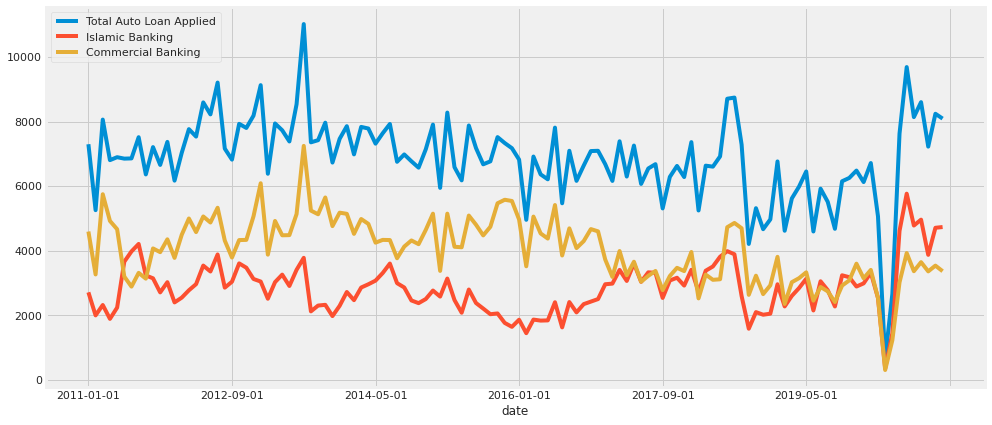

In [ ]:
auto = data[["tot_auto", "isl_auto","comm_auto"]]
auto.plot(figsize=(15, 7))
plt.legend(["Total Auto Loan Applied", "Islamic Banking", "Commercial Banking"], loc ="upper left")

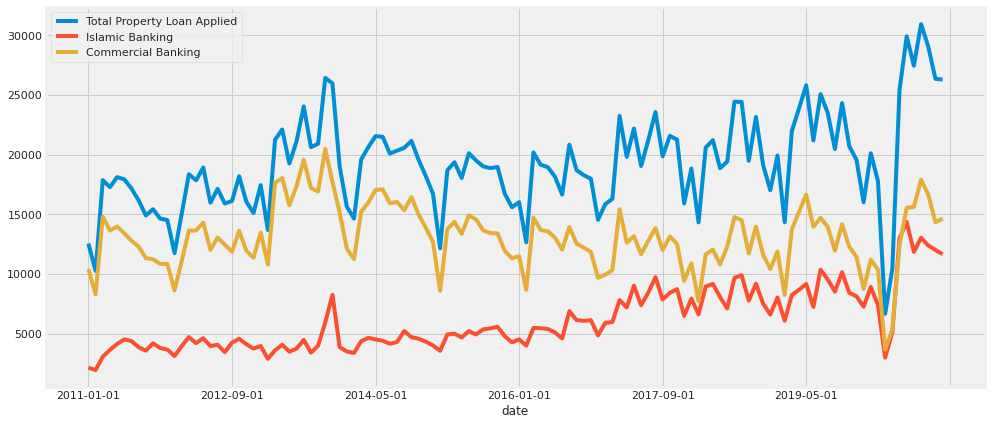

In [ ]:
property = data[["tot_prop", "isl_prop","comm_prop"]]
property.plot(figsize=(15, 7))
plt.legend(["Total Property Loan Applied", "Islamic Banking", "Commercial Banking"], loc ="upper left")

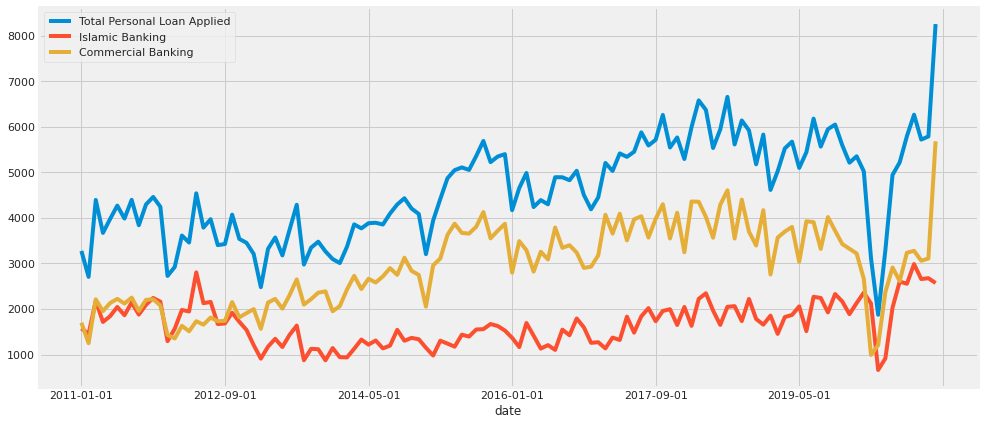

In [ ]:
personal = data[["tot_per", "isl_per","comm_per"]]
personal.plot(figsize=(15, 7))
plt.legend(["Total Personal Loan Applied", "Islamic Banking", "Commercial Banking"], loc ="upper left")

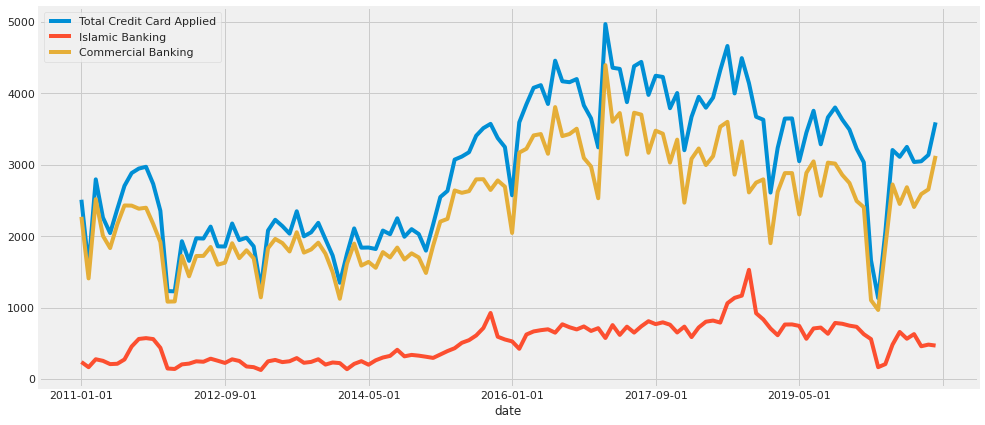

In [ ]:
credit = data[["tot_cc", "isl_cc","comm_cc"]]
credit.plot(figsize=(15, 7))
plt.legend(["Total Credit Card Applied", "Islamic Banking", "Commercial Banking"], loc ="upper left")

           tot_auto  tot_prop   tot_per  ...  comm_prop  comm_per   comm_cc
tot_auto   1.000000  0.397978 -0.046050  ...   0.603736 -0.169061 -0.147806
tot_prop   0.397978  1.000000  0.520664  ...   0.773587  0.385316  0.278157
tot_per   -0.046050  0.520664  1.000000  ...   0.056571  0.904349  0.781948
tot_cc    -0.180698  0.310170  0.819715  ...  -0.086018  0.837070  0.982296
isl_auto   0.625035  0.538448  0.305818  ...   0.325451  0.052062  0.063077
isl_prop  -0.005860  0.754807  0.751369  ...   0.168242  0.574951  0.511699
isl_per    0.216641  0.465044  0.579411  ...   0.085401  0.176138  0.235153
isl_cc    -0.236865  0.338457  0.763972  ...  -0.096131  0.716724  0.740064
comm_auto  0.786132  0.083487 -0.301130  ...   0.515713 -0.257792 -0.239285
comm_prop  0.603736  0.773587  0.056571  ...   1.000000  0.023604 -0.076327
comm_per  -0.169061  0.385316  0.904349  ...   0.023604  1.000000  0.821266
comm_cc   -0.147806  0.278157  0.781948  ...  -0.076327  0.821266  1.000000

[12 rows x 

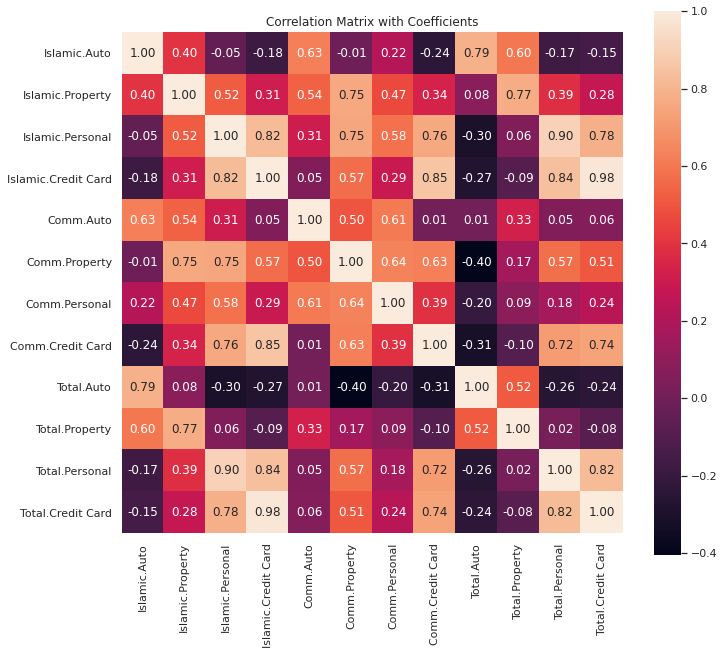

In [ ]:
corrMatrix = data.corr()
print (corrMatrix)

cols = ['Islamic.Auto','Islamic.Property','Islamic.Personal','Islamic.Credit Card',
        'Comm.Auto','Comm.Property','Comm.Personal','Comm.Credit Card',
        'Total.Auto','Total.Property','Total.Personal','Total.Credit Card',]
plt.figure(figsize=(10,10))
sns.set(font_scale=1.0)


hm = sns.heatmap(corrMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Correlation Matrix with Coefficients')
#plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Commercial - Auto Loan Application')

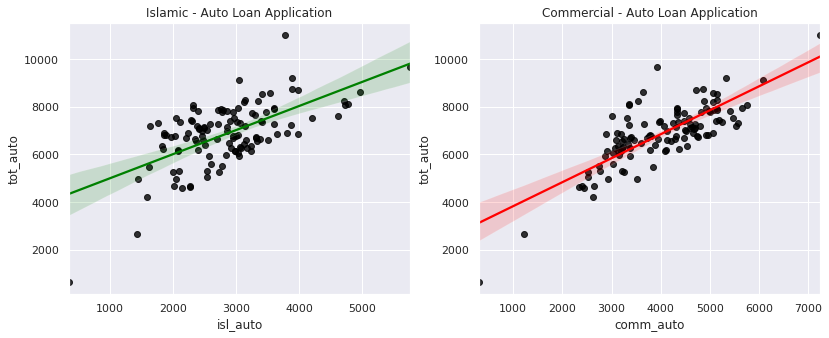

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
sns.regplot(x = "isl_auto",
            y = "tot_auto",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
plt.title('Islamic - Auto Loan Application')

plt.subplot(1, 2, 2)
sns.regplot(x = "comm_auto",
            y = "tot_auto",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Commercial - Auto Loan Application')

Text(0.5, 1.0, 'Commercial - Property Loan Application')

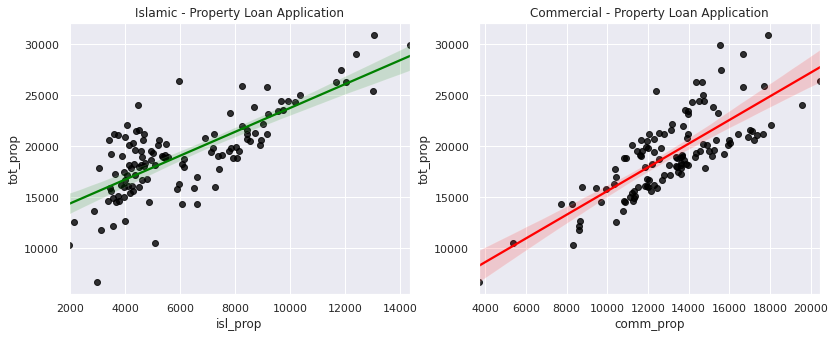

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.regplot(x = "isl_prop",
            y = "tot_prop",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
plt.title('Islamic - Property Loan Application')

plt.subplot(1, 2, 2)
sns.regplot(x = "comm_prop",
            y = "tot_prop",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Commercial - Property Loan Application')

Text(0.5, 1.0, 'Commercial - Personal Loan Application')

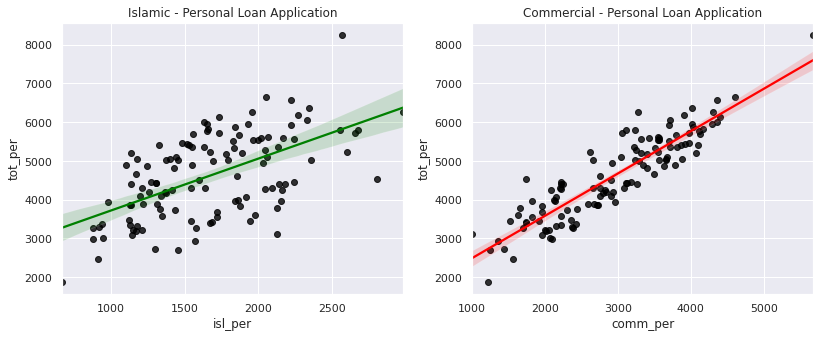

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.regplot(x = "isl_per",
            y = "tot_per",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
plt.title('Islamic - Personal Loan Application')

plt.subplot(1, 2, 2)
sns.regplot(x = "comm_per",
            y = "tot_per",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Commercial - Personal Loan Application')

Text(0.5, 1.0, 'Commercial - Credit Card Loan Application')

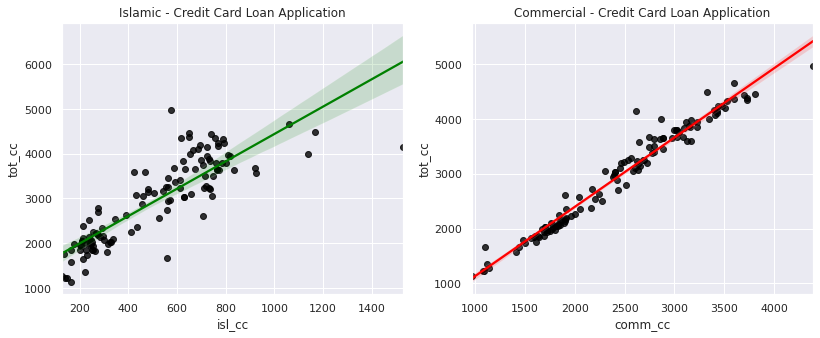

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.regplot(x = "isl_cc",
            y = "tot_cc",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
plt.title('Islamic - Credit Card Loan Application')

plt.subplot(1, 2, 2)
sns.regplot(x = "comm_cc",
            y = "tot_cc",
            data = data,
            dropna = True,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.title('Commercial - Credit Card Loan Application')

           tot_auto  tot_prop   tot_per  ...  comm_prop  comm_per   comm_cc
tot_auto   1.000000  0.397978 -0.046050  ...   0.603736 -0.169061 -0.147806
tot_prop   0.397978  1.000000  0.520664  ...   0.773587  0.385316  0.278157
tot_per   -0.046050  0.520664  1.000000  ...   0.056571  0.904349  0.781948
tot_cc    -0.180698  0.310170  0.819715  ...  -0.086018  0.837070  0.982296
isl_auto   0.625035  0.538448  0.305818  ...   0.325451  0.052062  0.063077
isl_prop  -0.005860  0.754807  0.751369  ...   0.168242  0.574951  0.511699
isl_per    0.216641  0.465044  0.579411  ...   0.085401  0.176138  0.235153
isl_cc    -0.236865  0.338457  0.763972  ...  -0.096131  0.716724  0.740064
comm_auto  0.786132  0.083487 -0.301130  ...   0.515713 -0.257792 -0.239285
comm_prop  0.603736  0.773587  0.056571  ...   1.000000  0.023604 -0.076327
comm_per  -0.169061  0.385316  0.904349  ...   0.023604  1.000000  0.821266
comm_cc   -0.147806  0.278157  0.781948  ...  -0.076327  0.821266  1.000000

[12 rows x 

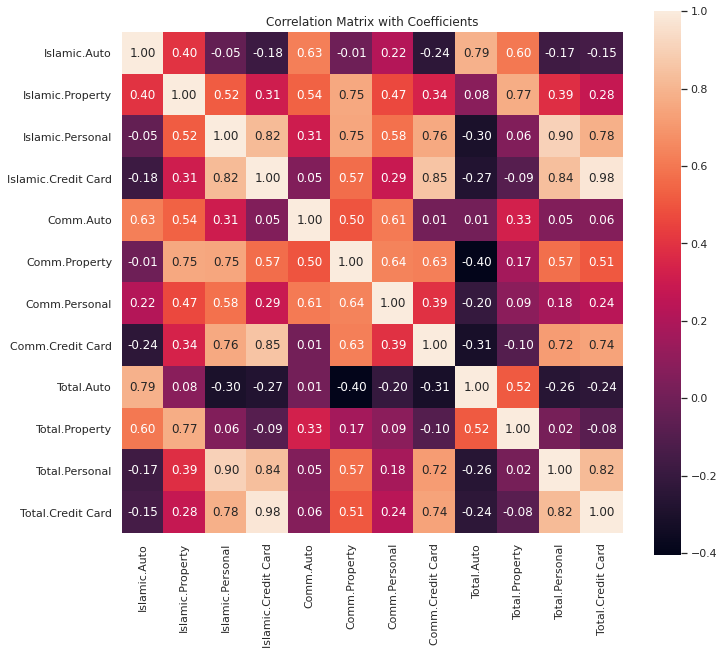

In [ ]:
plt.figure(figsize=(10,10))

corrMatrix = data.corr()
print (corrMatrix)

cols = ['Islamic.Auto','Islamic.Property','Islamic.Personal','Islamic.Credit Card',
        'Comm.Auto','Comm.Property','Comm.Personal','Comm.Credit Card',
        'Total.Auto','Total.Property','Total.Personal','Total.Credit Card',]

sns.set(font_scale=1.0)

hm = sns.heatmap(corrMatrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Correlation Matrix with Coefficients')
#plt.tight_layout()
plt.show()